In [1]:
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

np.random.seed(0)

def numerical_derivative(f, x):
    delta_x = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    
    while not it.finished:
        idx = it.multi_index        
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + delta_x
        fx1 = f(x) # f(x+delta_x)
        
        x[idx] = float(tmp_val) - delta_x 
        fx2 = f(x) # f(x-delta_x)
        grad[idx] = (fx1 - fx2) / (2*delta_x)
        
        x[idx] = tmp_val 
        it.iternext()   
        
    return grad


def sigmoid(z):
    
    return 1 / (1+np.exp(-z))

In [6]:
class SimpleTest:
    
    # constructor
    def __init__(self, xdata, tdata, learning_rate, iteration_count):
            
        # 가중치 W 형상을 자동으로 구하기 위해 입력데이터가 vector 인지,
        # 아니면 matrix 인지 체크 후, 
        # self.xdata 는 무조건 matrix 로 만들어 주면 코드 일관성이 있음
        
        if xdata.ndim == 1:    # vector
            self.xdata = xdata.reshape(len(xdata), 1)
            self.tdata = xdata.reshape(len(tdata), 1)
            
        elif xdata.ndim == 2:  # matrix
            self.xdata = xdata
            self.tdata = tdata
        
        self.learning_rate = learning_rate
        self.iteration_count = iteration_count
        
        self.W = np.random.rand(self.xdata.shape[1], 1) 
        self.b = np.random.rand(1)
        
        self.loss_val_list = []
        
        print("SimpleTest Object is created")

    
    # loss function
    def loss_func(self):
    
        delta = 1e-7
        
        z = np.dot(self.xdata, self.W) + self.b
        
        y = sigmoid(z)
            
        # cross-entropy 
        return  -np.sum( self.tdata*np.log(y + delta) + (1-self.tdata)*np.log((1 - y)+delta ) ) 

    
    # display current error value
    def error_val(self):
        
        delta = 1e-7
        
        z = np.dot(self.xdata, self.W) + self.b
        
        y = sigmoid(z)
            
        # cross-entropy 
        return  -np.sum( self.tdata*np.log(y + delta) + (1-self.tdata)*np.log((1 - y)+delta ) ) 

    
    # predict method
    # 학습을 마친 후, 임의의 데이터에 대해 미래 값 예측 함수
    # 입력변수 x : numpy type
    def predict(self, test_data):
    
        z = np.dot(test_data, self.W) + self.b
        y = sigmoid(z)
    
        if y >= 0.5:
            result = 1  # True
        else:
            result = 0  # False
    
        return y, result
    
    
    def display_lossval_trend(self):
        
        plt.title('Loss Value Trend')
        plt.xlabel('epochs ( X 1000)')
        plt.ylabel('loss value')
        plt.grid()

        label_str = 'lr=' + str(self.learning_rate) + ', epoch=' + str(self.iteration_count)
        
        plt.plot(self.loss_val_list, ls='--', lw=2, color='r', label=label_str)
        plt.legend(loc='best')

        plt.show()
        
    # train method
    def train(self):
    
        f = lambda x : self.loss_func()

        print("Initial error value = ", self.error_val() )

        start_time = datetime.now()
        
        for step in  range(self.iteration_count):  
    
            self.W -= self.learning_rate * numerical_derivative(f, self.W)
    
            self.b -= self.learning_rate * numerical_derivative(f, self.b)
    
            if (step % (int)(0.05*self.iteration_count) == 0):  # 반복횟수의 5% 마다 출력
            
                current_loss_val = self.error_val()                
                print("step = ", step, "error value = ", current_loss_val )                
                self.loss_val_list.append(current_loss_val)
                
                
        end_time = datetime.now()
        
        print("")
        print("Elapsed Time => ", end_time - start_time)

In [7]:
# 입력데이터 / 정답데이터 세팅

x_data = np.array( [ [2, 4], [4, 11], [6, 6], [8, 5], [10, 7], [12, 16], [14, 8], [16, 3], [18, 7] ] )
t_data = np.array( [0, 0, 0, 0, 1, 1, 1, 1, 1] ).reshape(9, 1)

print("x_data.shape = ", x_data.shape, ", t_data.shape = ", t_data.shape)

x_data.shape =  (9, 2) , t_data.shape =  (9, 1)


### learning_rate = 1e-2,  반복횟수 100,000번 수행하는 obj1

In [8]:
obj1 = SimpleTest(x_data, t_data, 1e-2, 100001)

obj1.train()

SimpleTest Object is created
Initial error value =  24.530845735803375
step =  0 error value =  13.84193522570496
step =  5000 error value =  0.6057347936138725
step =  10000 error value =  0.404752181694653
step =  15000 error value =  0.307254085534242
step =  20000 error value =  0.24752574262890575
step =  25000 error value =  0.20704534521109624
step =  30000 error value =  0.1778168859460816
step =  35000 error value =  0.15574150180467605
step =  40000 error value =  0.1384927305520226
step =  45000 error value =  0.12465169975086984
step =  50000 error value =  0.11330436681434057
step =  55000 error value =  0.10383572614160616
step =  60000 error value =  0.09581700930378508
step =  65000 error value =  0.08894029934147153
step =  70000 error value =  0.08297884587377145
step =  75000 error value =  0.07776203083335073
step =  80000 error value =  0.07315904719234392
step =  85000 error value =  0.06906795073077539
step =  90000 error value =  0.06540813093680108
step =  9500

In [9]:
test_data = np.array([3, 17])

(real_val, logical_val) = obj1.predict(test_data)

print(real_val, logical_val)

[0.15440894] 0


In [10]:
test_data = np.array([5, 8])

(real_val, logical_val) = obj1.predict(test_data)

print(real_val, logical_val)

[0.00071376] 0


In [11]:
test_data = np.array([7, 21])

(real_val, logical_val) = obj1.predict(test_data)

print(real_val, logical_val)

[0.99999641] 1


In [12]:
test_data = np.array([12, 0])

(real_val, logical_val) = obj1.predict(test_data)

print(real_val, logical_val)

[0.59987656] 1


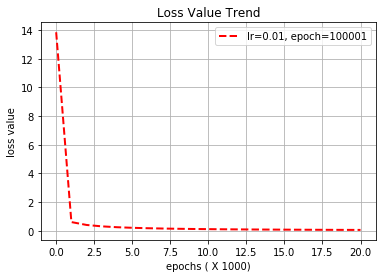

In [13]:
obj1.display_lossval_trend()